# Yelp Customer Sentiment Analysis

The purpose of this project is to utilize natural language processing (NLP) to predict Yelp customer ratings based on user reviews. This type of analysis is useful for businesses to gauge the general opinion of a product or service. In addition, it will provide a deeper understanding of customer experience and consumer satisfaction. 

After converting the reviews to word vectors, I will explore the dataset. Then, I will create a support vector machines (SVM) model that will learn from the dataset to make predictions. Finally, I will evaluate the results of my model.

#   
## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
import sklearn

#  
## Data 

There is a total of 44530 ratings in this data set collected from [Kaggle](https://www.kaggle.com/matleonard/nlp-course). 

Each row contains the following information: **text** (customer review), **stars** (customer rating between 1 and 5), and **sentiment** (0 if negative review, 1 if positive review).

In [2]:
yelp_ratings = pd.read_csv('yelp_ratings.csv')
yelp_ratings

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0
...,...,...,...
44525,"Petit café sympa, peu de place assise. Bonne b...",4.0,1
44526,Absolutely delicious! The food was full of ama...,5.0,1
44527,I love this place! They always have the cutes...,4.0,1
44528,i would understand a 2 hour wait for food if i...,2.0,0


Calculating 44,530 document vectors will take a long period of time. Instead, I will only use the first 5000 reviews to make predictions.

In [3]:
reviews = yelp_ratings[:5000]
reviews

,text,stars,sentiment
0,Total bill for this horrible service? Over $8G...,1.0,0
1,I *adore* Travis at the Hard Rock's new Kelly ...,5.0,1
2,I have to say that this office really has it t...,5.0,1
3,Went in for a lunch. Steak sandwich was delici...,5.0,1
4,Today was my second out of three sessions I ha...,1.0,0
...,...,...,...
4995,Delicious local kine of food. Waiting to try ...,5.0,1
4996,Best place to get your hair cut up. Nick was t...,5.0,1
4997,My last experience at this location was 3 star...,4.0,1
4998,"We ordered a chicken gyro, Akropolis fries and...",5.0,1


#  
## Exploratory Data Analysis (EDA) 

Text(0.5, 0, 'Sentiment Group')

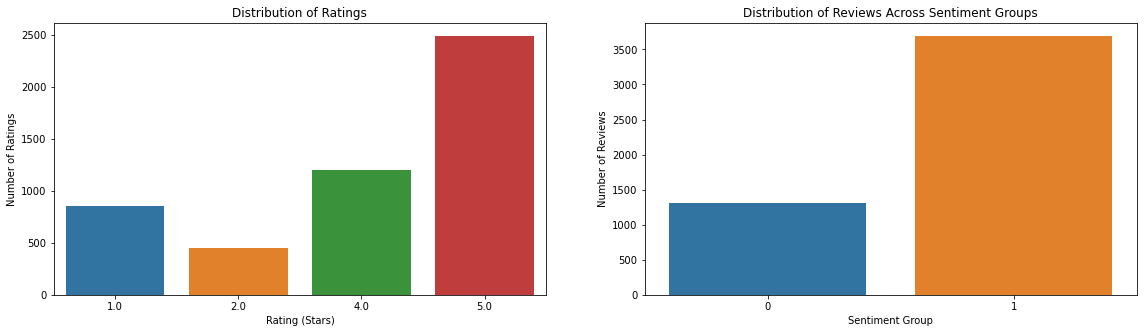

In [4]:
fig, ax = plt.subplots(1,2,figsize=(30, 5))

# Bar chart showing distribution of ratings
plt.subplot(1,3,1)
plt.title("Distribution of Ratings")
sns.countplot(data = reviews, x = 'stars')
plt.ylabel("Number of Ratings")
plt.xlabel("Rating (Stars)")

# Bar chart showing average profit by gender
plt.subplot(1, 3, 2)
plt.title("Distribution of Reviews Across Sentiment Groups")
sns.countplot(data = reviews, x = 'sentiment')
plt.ylabel("Number of Reviews")
plt.xlabel("Sentiment Group")

As you can see, most reviews are positive (Sentiment Group 1; Rating 4 or 5). This is typical of Yelp reviews.

#  
## Model Development

I will first convert all reviews to word vectors so they can be processed by the NLP model. Then, I will split the data into a training set (90%) and test set (10%). Finally, I will train a support vector machine (SVM) model using the reviews from the training set. Specifically, I will use the SVM classifier, LinearSVC, since it works well with high dimensional data.

In [5]:
# Load the large model to get the vectors
nlp = spacy.load('en_core_web_lg')

In [6]:
# Create word vectors for all reviews
with nlp.disable_pipes():
    vectors = np.array([nlp(review.text).vector for idx, review in reviews.iterrows()])

In [7]:
# Create a training and test set
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(vectors, reviews.sentiment, 
                                                    test_size=0.1, random_state=1)

In [8]:
# Create the LinearSVC model
model = LinearSVC(random_state=1, dual=False)

# Fit the model
model.fit(X_train, y_train)

LinearSVC(dual=False, random_state=1)

#  
## Model Result 

In [9]:
# Print model accuracy
print(f'Model test accuracy: {model.score(X_test, y_test)*100:.3f}%')

Model test accuracy: 95.200%


In [10]:
# Get review sentiment predictions
y_pred = model.predict(X_test)

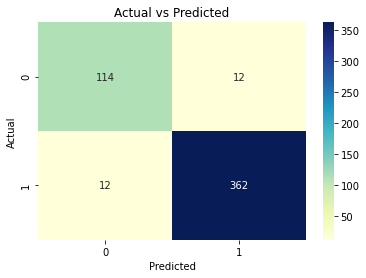

In [12]:
# Create confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu", fmt='g')
plt.title("Actual vs Predicted")
plt.show()

My model correctly classified 95.2% of the reviews. 2.8% (12/500) of reviews were predicted to be positive reviews, but were actually negative reviews and another 2.8% of reviews were predicted to be negative reviews, but were actually positive reviews.

#  
## Conclusion 

In conclusion, my model successfully predicted whether most reviews were positive or negative. Specifically, it correctly classified 95.2% of the reviews with only 4500 reviews to learn from. However, the model accuracy may change by increasing the number of reviews in the training set.